In [57]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
import math
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.tokenize import TweetTokenizer

In [22]:
device = torch.device('cpu')

In [26]:
data = pd.read_csv("/home/shasankgunturu/machineLearning/datasets/clean_tweet_Dec19ToDec20.csv")
data.head()

,Unnamed: 0,text,sentiment
0,0,text,0
1,1,rising cases of covid does not alarm me rising...,1
2,2,please vote for chicagoindiaresolution marking...,0
3,3,wishing all of you eidaladha hazrat ibrahim as...,1
4,4,daily coronavirus cases in india top for first...,1


In [27]:
data.pop(data.columns[0])

0              0
1              1
2              2
3              3
4              4
           ...  
134343    134343
134344    134344
134345    134345
134346    134346
134347    134347
Name: Unnamed: 0, Length: 134348, dtype: int64

In [31]:
print(len(data))
print(data.dtypes)

134348
text         object
sentiment     int64
dtype: object


In [40]:
np.sum(data.isnull().any(axis=1)) # 18 rows which have null value

18

In [43]:
data.dropna(inplace=True)

In [48]:
print(len(data))
print(np.sum(data.isnull().any(axis=1)))
print(data['sentiment'].unique())

134330
0
[0 1]


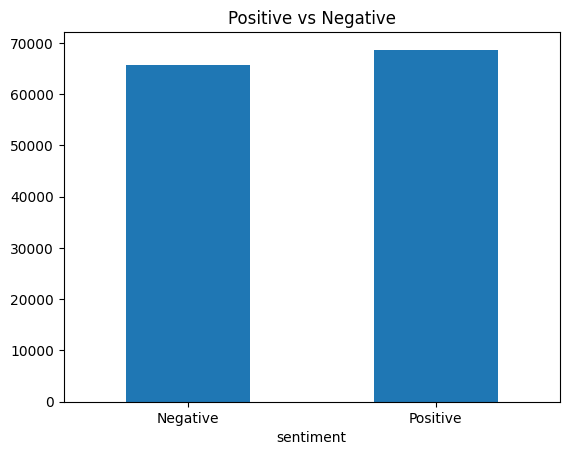

In [50]:
ax = data.groupby("sentiment").count().plot(kind="bar", title="Positive vs Negative", legend=False)
ax.set_xticklabels(['Negative', 'Positive'], rotation=0)
text, sentiment = list(data["text"]), list(data["sentiment"])

In [55]:
data['text'] = data.text.str.lower()    

In [58]:
tknzr = TweetTokenizer()
data['tokens'] = data['text'].apply(tknzr.tokenize)

In [59]:
data.head()

,text,sentiment,tokens
0,text,0,[text]
1,rising cases of covid does not alarm me rising...,1,"[rising, cases, of, covid, does, not, alarm, m..."
2,please vote for chicagoindiaresolution marking...,0,"[please, vote, for, chicagoindiaresolution, ma..."
3,wishing all of you eidaladha hazrat ibrahim as...,1,"[wishing, all, of, you, eidaladha, hazrat, ibr..."
4,daily coronavirus cases in india top for first...,1,"[daily, coronavirus, cases, in, india, top, fo..."
